The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Honest Buyer： 0.9662129220135564
Dishonest Buyer： 0.4374100438179942


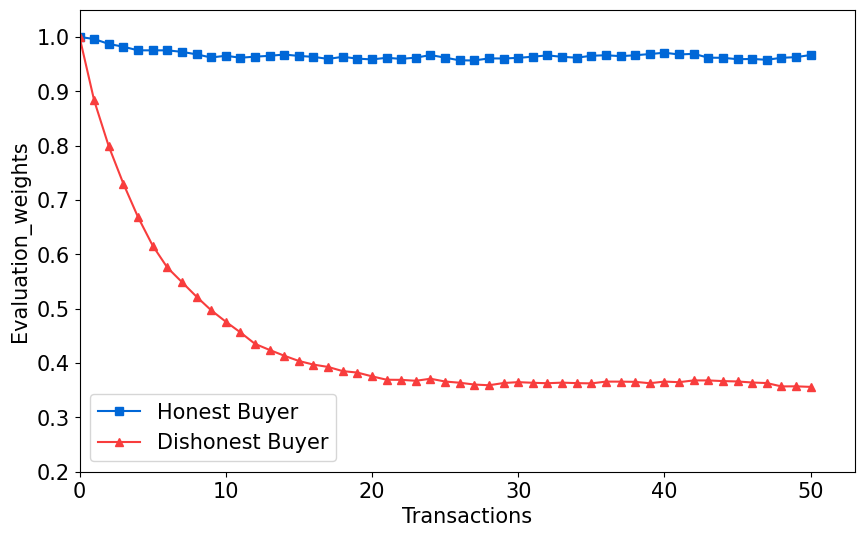

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams.update({'font.size': 15})
#font = FontProperties(fname='C:/Windows/Fonts/msyh.ttc', size=19)

fig, ax = plt.subplots(figsize=(10, 6))
def honest_buyer():
    weight = 1
    ratings = [1]
    for i in range(1, 51):
        if random.random() < 0.05:
            rating = random.uniform(0.3, 0.57)
        else:
            rating = random.uniform(0.57, 1)
        if rating < 0.57:
            weight = 0.75 * weight + 0.25 * rating
        else:
            weight = min(weight + 0.02, 1)
        ratings.append(weight)
    return ratings

def dishonest_buyer():
    weight = 1
    ratings = [1]
    for i in range(1, 51):
        if random.random() < 0.7:
            rating = random.uniform(0.1, 0.57)
        else:
            rating = random.uniform(0.57, 0.8)
        if rating < 0.55:
            weight = 0.75 * weight + 0.25 * rating
        else:
            weight = min(weight + 0.02, 1)
        ratings.append(weight)
    return ratings

num_experiments = 200
num_transactions = 50
honest_ratings_sum = [0] * (num_transactions + 1)
dishonest_ratings_sum = [0] * (num_transactions + 1)

for i in range(num_experiments):
    honest_ratings = honest_buyer()
    dishonest_ratings = dishonest_buyer()
    for j in range(num_transactions + 1):
        honest_ratings_sum[j] += honest_ratings[j]
        dishonest_ratings_sum[j] += dishonest_ratings[j]

honest_ratings_avg = [x/num_experiments for x in honest_ratings_sum]
dishonest_ratings_avg = [x/num_experiments for x in dishonest_ratings_sum]

plt.plot(honest_ratings_avg, label='Honest Buyer', marker='s', color='#0067D7')
plt.plot(dishonest_ratings_avg, label='Dishonest Buyer', marker='^', color='#F83D3D')

plt.xlabel('Transactions')
plt.ylabel('Evaluation_weights')
plt.xlim(0, num_transactions + 3)
plt.ylim(0.2, 1.05)
plt.legend()
plt.savefig('Evaluation_weights.eps', dpi=1000)
#plt.show()
honest_average_weight = sum(honest_ratings_avg) / len(honest_ratings_avg)
dishonest_average_weight = sum(dishonest_ratings_avg) / len(dishonest_ratings_avg)

print("Honest Buyer：", honest_average_weight)
print("Dishonest Buyer：", dishonest_average_weight)
